In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
#download the data (IBM Object Storage)
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-12 16:03:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2022-02-12 16:03:01 (2.99 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
#read data
df = pd.read_csv("FuelConsumption.csv")
df.head()

In [ ]:
#select some features into new DataFrame
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

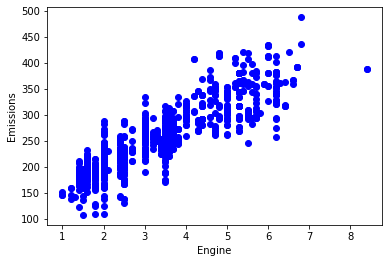

In [ ]:
#plot emission values with respect to Engine Size
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel("Engine")
plt.ylabel("Emissions")
plt.show()

In [ ]:
#creating train and test dataset using mask: 80% train 20% test
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

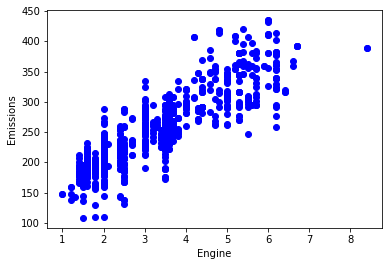

In [ ]:
#train data distribution shown by plotting the ENGINESIZE of train + CO2EMISSIONS of train only 
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
plt.xlabel("Engine")
plt.ylabel("Emissions")
plt.show()

In [ ]:
#multiple regression model
#predict CO2EMISSIONS (y axis) using FUELCONSUMPTION_COMB, ENGINESIZE and CYLINDERS (x axis)
#using TRAIN dataset (not TEST)

from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)

#coefficients of this LINEAR REGRESSION
print("coefficients: ", regr.coef_)

coefficients:  [[8.95461241 8.8314349  9.53384825]]


In [ ]:
#Prediction for TEST dataset... test model by making prediction on remaining untrained data
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
#TEST dataset for x and y
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test['CO2EMISSIONS'])

print("residual sum of squares: %.2f" % np.mean((y_hat - y)**2))
print("variance score: %.2f" % regr.score(x,y))

residual sum of squares: 7667.99
variance score: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
from sklearn import linear_model
regr = linear_model.LinearRegression
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)

print("coefficients: ", regr.coef_)
      
#prediction
y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("residual sum of squares: %.2f" % np.mean((y_ - y) ** 2))
print("variance score: %.2f" % regr.score(x,y))

TypeError: ignored